# Converting int16 to int8

In [2]:
import matplotlib.pyplot as plt # Library used for plotting
import numpy as np # library for array manipulation
import tifffile # library to store numpy arrays in TIFF
import pathlib # library to work with file paths
from skimage.io import imread
plt.style.use('dark_background')

In [25]:
def convert_int_8(img,destination_name_and_path=None,max_frames=None,list_chanels_to_export=None):
    '''
    This function is inteded to normalize img and change the image to the specified target_type
      img: numpy array. This function expects an input array with the first column containing the frames in the image. #[T,Z,Y,X,C]
      destination_name_and_path: string or path including the name and extension of the new image.
      max_frames: int, indicating the maximum number of frames to consider.
      list_chanels_to_export: list of int. List of channels to export in the final file.
    '''
    # Changing the img to int8
    new_img = (img/ img.max()) *255
    new_img = np.uint8(new_img)
    
    # Reducing the number of frames
    if not (max_frames is None) and (img.shape[0]>max_frames):
      new_img=new_img[0:max_frames,...]
    
    if not (list_chanels_to_export is None):
      new_img=new_img[...,list_chanels_to_export]
      
    # reorder dimensions
    
    # Saving the image as .tif
    if not (destination_name_and_path is None):
      tifffile.imwrite(destination_name_and_path, new_img)
    return new_img

In [34]:
# Main directory
current_dir = pathlib.Path().absolute()
# Image to convert
#image_path= current_dir.parents[0].joinpath('dataBase','Hela_confocal.tif') 
#image_path = current_dir.parents[0].joinpath('dataBase').joinpath('FISH_Analysis','GAPDH_Exon_Cy5_short','ROI001_XY1620755243_Z00_T0_merged.tif') 
#image_path = current_dir.parents[0].joinpath('dataBase').joinpath('RAN','Cell03.tif') 
#image_path = current_dir.parents[0].joinpath('dataBase').joinpath('smFLAG-ActB','MAX_Cell01.tif')

image_path = current_dir.parents[0].joinpath('dataBase').joinpath('Gabriel_HT_example','MAX_bactin_Cell04_Good.tif')

# Directories for images and database
new_image_path=image_path.parents[0].joinpath(image_path.stem+'_int8.tif')


In [35]:
# Reading the original image as numpy arrays
original_image = imread(str(image_path)) 
print('Original image')
print('Image shape: ', original_image.shape) #[T,Z,Y,X,C]
print("File size : ", round(image_path.stat().st_size/1e6),' Mb' )
print("Image range:  (", np.min(original_image), ',' , np.max(original_image) ,')' )

Original image
Image shape:  (60, 2, 512, 512)
File size :  63  Mb
Image range:  ( 0 , 7930 )


In [36]:
#Convert an image to unsigned byte format, with values in [0, 255].
img_int8 = convert_int_8(original_image, destination_name_and_path=new_image_path,max_frames=None)
print('int8 image')
print('Image shape: ', img_int8.shape)  #[T,Z,Y,X,C]
print("File size : ", round(new_image_path.stat().st_size/1e6),' Mb' )
print("Image range:  (", np.min(img_int8), ',' , np.max(img_int8) ,')' )

int8 image
Image shape:  (60, 2, 512, 512)
File size :  31  Mb
Image range:  ( 0 , 255 )


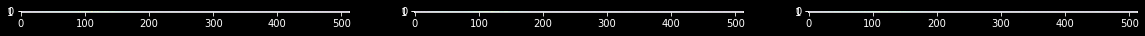

In [37]:
# Just examining one of the images works for images with  the following dimensions [T,Z,Y,X,C] or [T,Y,X,C]
num_channels = 3
fig, ax = plt.subplots(nrows=1, ncols=num_channels,figsize=(20,10))
for i in range(0,num_channels):
    if len(img_int8.shape) ==4: #[T,Y,X,C]
        ax[i].imshow(np.max(img_int8[:,:,:,i] ,axis=0) )
    elif len(img_int8.shape) ==5: #[T,Z,Y,X,C]
        ax[i].imshow(np.max(img_int8[0,:,:,:,i] ,axis=0) )
    ax[i].grid(False)